In [3]:
from IPython.display import HTML
import folium
import random as RD
import pandas as pd
import pysal as ps
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [4]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

## Binding Attribute Data to the Map

In [5]:
import json

f = open(r'data/south.json')
q = json.load(f)
f.close()

In [6]:
q.keys()

[u'type', u'features']

In [7]:
features = q['features']
len(features)

1412

In [8]:
feature_0 = features[0]

In [9]:
feature_0

{u'geometry': {u'coordinates': [[[-80.6280517578125, 40.39815902709961],
    [-80.60203552246094, 40.480472564697266],
    [-80.62545776367188, 40.504398345947266],
    [-80.6336441040039, 40.53913879394531],
    [-80.6688232421875, 40.568214416503906],
    [-80.66793060302734, 40.58207321166992],
    [-80.63754272460938, 40.61391830444336],
    [-80.61175537109375, 40.619998931884766],
    [-80.57462310791016, 40.615909576416016],
    [-80.52220916748047, 40.63713836669922],
    [-80.52456665039062, 40.47871780395508],
    [-80.52377319335938, 40.4029655456543],
    [-80.6280517578125, 40.39815902709961]]],
  u'type': u'Polygon'},
 u'properties': {u'BLK60': 3.839454752,
  u'BLK70': 3.2554278095,
  u'BLK80': 2.5607402642,
  u'BLK90': 2.5572616581,
  u'CNTY_FIPS': u'029',
  u'COFIPS': 29.0,
  u'DNL60': 6.1681225056,
  u'DNL70': 6.1714993547,
  u'DNL80': 6.1714631077,
  u'DNL90': 6.0508978146,
  u'DV60': 2.2779893943,
  u'DV70': 2.5591397849,
  u'DV80': 5.0619350519,
  u'DV90': 7.2636377

In [10]:
import pandas as pd
indices = []
values = []
for feature in features:
    indices.append(str(feature['properties']['FIPS']))
    values.append(feature['properties']['HR80'])

In [11]:
df = pd.DataFrame({'HR80': values,
                   'FIPS': indices} )

In [12]:

map_osm = folium.Map(location=[33.7550, -87.3900], zoom_start=5,)
map_osm.geo_json(geo_path='data/south.json',
                 key_on='feature.properties.FIPS',
                 data_out='data.json', data=df,
                 columns=['FIPS','HR80'],
                 fill_color='YlGnBu', fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='Homicide Rate HR80')
embed_map(map_osm)


In [13]:
y = np.array(df.HR80.tolist())

In [14]:
bins= ps.Quantiles(y, 5).bins.tolist()
map_osm = folium.Map(location=[33.7550, -87.3900], zoom_start=5,)
map_osm.geo_json(geo_path='data/south.json',
                 key_on='feature.properties.FIPS',
                 data_out='data.json', data=df,
                 columns=['FIPS','HR80'],
                 fill_color='YlGnBu', fill_opacity=0.7,
                 line_opacity=0.2,
                 threshold_scale=bins[:-1],
                 legend_name='Homicide Rate HR80 (Quantiles k=5)')
embed_map(map_osm)

## Global Spatial Autocorrelation

In [15]:
w = ps.queen_from_shapefile('data/south.shp')

In [16]:
w.n

1412

In [17]:
w.transform = 'r'

In [18]:
np.random.seed(12345)
mi_hr80 = ps.Moran(y, w)

In [19]:
mi_hr80.p_sim

0.001

In [20]:
mi_hr80.I

0.25211526521758648

In [21]:
mi_hr80.EI

-0.0007087172218284905

In [22]:
mi_hr80.p_norm

0.0

In [23]:
yr = np.random.permutation(y)

In [24]:
df['yrandom'] = yr

In [25]:
type(y)

numpy.ndarray

In [26]:
bins= ps.Quantiles(y, 5).bins.tolist()
map_osm = folium.Map(location=[33.7550, -87.3900], zoom_start=5,)
map_osm.geo_json(geo_path='data/south.json',
                 key_on='feature.properties.FIPS',
                 data_out='data.json', data=df,
                 columns=['FIPS','HR80'],
                 fill_color='YlGnBu', fill_opacity=0.7,
                 line_opacity=0.2,
                 threshold_scale=bins[:-1],
                 legend_name='Homicide Rate HR80 (Quantiles k=5)')
embed_map(map_osm)

In [27]:
bins= ps.Quantiles(y, 5).bins.tolist()
map_osm = folium.Map(location=[33.7550, -87.3900], zoom_start=5,)
map_osm.geo_json(geo_path='data/south.json',
                 key_on='feature.properties.FIPS',
                 data_out='data.json', data=df,
                 columns=['FIPS','yrandom'],
                 fill_color='YlGnBu', fill_opacity=0.7,
                 line_opacity=0.2,
                 threshold_scale=bins[:-1],
                 legend_name='Spatially Random Homicide Rate HR80 (Quantiles k=5)')
embed_map(map_osm)

In [28]:
mi_hr80_random = ps.Moran(df['yrandom'],w)

In [29]:
mi_hr80_random.I

-0.0075100395407745081

In [30]:
mi_hr80_random.p_sim

0.34799999999999998

In [31]:
ps.Moran??

In [32]:
from scipy.stats import gaussian_kde

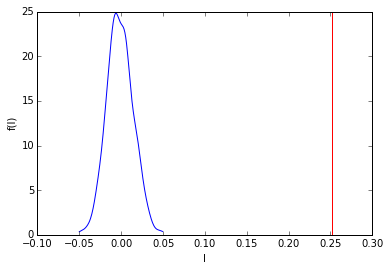

In [33]:
density = gaussian_kde(mi_hr80.sim)
xs = linspace(mi_hr80.sim.min(),mi_hr80.sim.max(),200)
plot(xs, density(xs))
axvline(x=mi_hr80.I, color='r')
xlabel('I')
ylabel('f(I)')

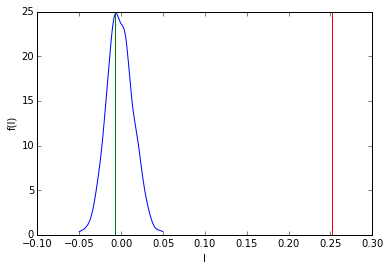

In [34]:
density = gaussian_kde(mi_hr80.sim)
xs = linspace(mi_hr80.sim.min(),mi_hr80.sim.max(),200)
plot(xs, density(xs))
axvline(x=mi_hr80.I, color='r')
axvline(x=mi_hr80_random.I, color='g')
xlabel('I')
ylabel('f(I)')

## Getis Ord Global G

In [35]:
wd = ps.G(y,w, permutations=999)

In [36]:
wd.p_norm

0.0

In [37]:
wd.p_sim

0.001